[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your_github_repo_here/your_notebook.ipynb)


Open this notebook in google colab as it would would already have pytorch installed on it. To run it locally you will need to install torch first. Colab is easier.

In [1]:
import numpy as np
import torch

In [2]:
torch.__version__

'2.4.0+cu121'

Watch: [PyTorch in 60 seconds](https://www.youtube.com/watch?v=ORMx45xqWkA)

In [3]:
torch.cuda.is_available() # used to check whether gpu is running or not

False

- In this notebook we will learn how to create and work with tensors using pytorch
- Tensor is a type of data structure in pytorch
- Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators.
- PyTorch tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section).
- They contain float, integer or boolean data  

In a DL model, all data - inputs/outputs/weights are expressed as tensors
-

## Tensor from list

In [4]:
# creating a list of list
x = [
    [1, 2],
    [3, 4]
]

In [5]:
print(type(x))
print(len(x))

<class 'list'>
2


In [6]:
# converting the list to a tensor
x_T = torch.tensor(x)

In [7]:
x_T

tensor([[1, 2],
        [3, 4]])

In [8]:
type(x_T)

torch.Tensor

## Tensor from numpy array

In [9]:
numpy_array = np.array(x)

In [10]:
numpy_array

array([[1, 2],
       [3, 4]])

In [11]:
numpy_array.shape

(2, 2)

In [12]:
na_T = torch.from_numpy(numpy_array)
na_T

tensor([[1, 2],
        [3, 4]])

In [13]:
type(na_T)

torch.Tensor

In [14]:
na_T.shape

torch.Size([2, 2])

In [15]:
torch.tensor(
    (
        (3, 4, 6),
        [7, 8, 9]
    )
)

tensor([[3, 4, 6],
        [7, 8, 9]])

torch.empty only allocates memory but does not initialize any values

In [16]:
torch.empty(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [17]:
torch.empty(3, 4).shape

torch.Size([3, 4])

In [18]:
torch.empty(2, 2, 2, 3, 2)

tensor([[[[[ 1.6479e-42,  0.0000e+00],
           [ 1.4013e-45,  0.0000e+00],
           [ 1.4013e-45,  7.0065e-45]],

          [[ 2.9427e-44,  0.0000e+00],
           [ 4.2161e+00,  3.3215e-41],
           [-4.1531e-27,  4.4456e-41]]],


         [[[ 1.4013e-45,  0.0000e+00],
           [ 1.4013e-45,  0.0000e+00],
           [ 1.4013e-45,  1.5414e-44]],

          [[ 7.0065e-45,  0.0000e+00],
           [ 4.2162e+00,  3.3215e-41],
           [ 4.2162e+00,  3.3215e-41]]]],



        [[[[ 4.2162e+00,  3.3215e-41],
           [ 4.2162e+00,  3.3215e-41],
           [ 4.2163e+00,  3.3215e-41]],

          [[ 4.2163e+00,  3.3215e-41],
           [ 2.8026e-44,  3.3215e-41],
           [-4.5187e-27,  4.4456e-41]]],


         [[[ 0.0000e+00,  0.0000e+00],
           [ 1.4013e-45,  3.3215e-41],
           [ 1.4013e-45,  1.6816e-44]],

          [[ 1.4013e-45,  1.8217e-44],
           [ 2.8026e-44,  2.2421e-44],
           [-4.5187e-27,  4.4456e-41]]]]])

In [19]:
torch.empty(2, 2, 2, 3, 2).shape

torch.Size([2, 2, 2, 3, 2])

The tensor has 5 dimensions (or axes).
- So, the tensor can be visualized as having:
- 2 "blocks", each containing:
  - 2 matrices, each containing:
    - 2 matrices, each of size:
      - 3 rows, with:
        - 2 columns.

In total, this tensor contains 2×2×2×3×2=48 elements.

In [20]:
torch.rand(2, 3)

tensor([[0.9518, 0.0857, 0.9287],
        [0.2895, 0.9023, 0.1363]])

In [21]:
torch.manual_seed(1234) # everytime same value
torch.rand(2, 3)

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]])

In [22]:
Y = torch.empty(3, 4)

In [23]:
torch.rand_like(Y)

tensor([[0.0518, 0.4681, 0.6738, 0.3315],
        [0.7837, 0.5631, 0.7749, 0.8208],
        [0.2793, 0.6817, 0.2837, 0.6567]])

## Tensor data types

- By default tensor has datayoe of `float32` populated i.e. 32-bit floating point.
- Data types are very important as they help in determining the compute required to train the model.

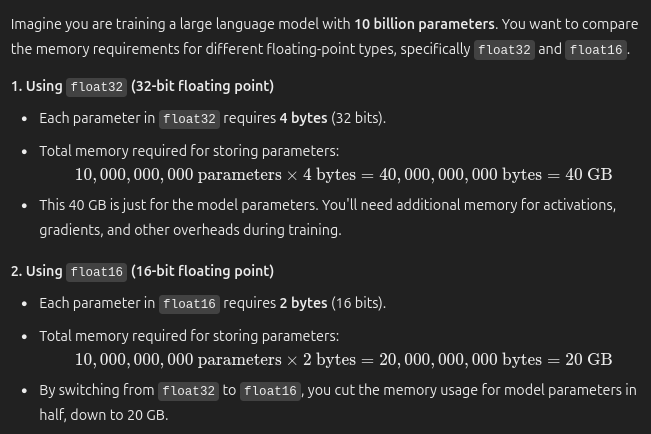

In [24]:
torch.ones(2, 4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [25]:
torch.ones(2, 4).dtype

torch.float32

In [26]:
torch.ones((2, 4), dtype= torch.float64)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

changing data type

In [27]:
b = torch.ones((2, 4), dtype= torch.float64)

c = b.to(torch.int8)

In [28]:
c

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int8)

## Tensor operations

In [29]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
square = twos ** 2
sqrt2s = twos ** 0.5

print("Before adding + 1")
print(torch.zeros(2, 2))
print("After adding + 1")
print(ones)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("Before multiplying 2")
print(torch.ones(2, 2))
print("After multiplying 2")
print(twos)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("Before square")
print(twos)
print("After square")
print(square)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("Before square root")
print(twos)
print("After square root")
print(sqrt2s)

Before adding + 1
tensor([[0., 0.],
        [0., 0.]])
After adding + 1
tensor([[1., 1.],
        [1., 1.]])
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Before multiplying 2
tensor([[1., 1.],
        [1., 1.]])
After multiplying 2
tensor([[2., 2.],
        [2., 2.]])
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Before square
tensor([[2., 2.],
        [2., 2.]])
After square
tensor([[4., 4.],
        [4., 4.]])
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Before square root
tensor([[2., 2.],
        [2., 2.]])
After square root
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


## Tensor Broadcasting

Tensor broadcasting is a technique in deep learning frameworks like PyTorch that automatically expands the shapes of tensors during arithmetic operations, without explicitly copying data.

Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is multiplied by both rows of the two-row, four-column tensor.

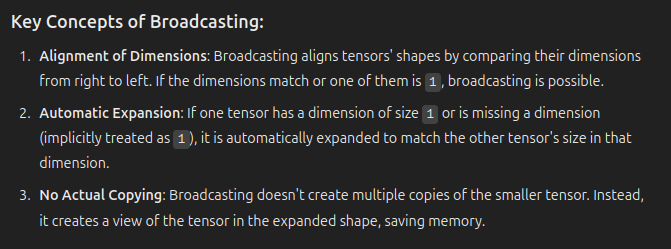

In [31]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
b = torch.tensor([10, 20, 30])            # Shape: (3)

# Broadcasting occurs to add 'b' to each row of 'a'
result = a + b

print(a)
print(b)
print("xxxxxxxxxxxxxxxxx")
print("Result")
print(result)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([10, 20, 30])
xxxxxxxxxxxxxxxxx
Result
tensor([[11, 22, 33],
        [14, 25, 36]])


- Tensor a has shape (2, 3), meaning it has 2 rows and 3 columns.
- Tensor b has shape (3), meaning it has 1 row with 3 elements.

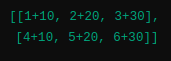

In this example, b is broadcast across each row of a. Since b has shape (3) and a has shape (2, 3), the system automatically "stretches" b to shape (2, 3) by replicating it along the first dimension.


- PyTorch has almost 300 mathematical operations.